# Воркшоп по регрессионному анализу

Предположим, мы хотим спрогнозировать зарплату специалиста, основываясь на продолжительности опыта работы.

Целевая переменная (Y) — это зарплата, а независимая переменная (X) — опыт.


Датасет содержит информацию о взаимосвязи между опытом работы (в месяцах) и соответствующей годовой зарплатой (в тысячах долларов) сотрудников в различных отраслях. Скачать датасет можно по ссылке: https://github.com/mokoron/productstar/blob/main/Experience-Salary.csv

## Загрузка и анализ данных

In [2]:
# Будем использовать pandas и sklearn для загрузки данных и создания линейной регрессии
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Загружаем данные из файла в pandas Dataframe
df = pd.read_csv("Experience-Salary.csv")

# Выведем первые 5 строк датасета
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
# Посмотрим, из чего состоит датасет

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
# анализ данных
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


Видим, что разброс зарплат от минус 1.2 до 55.3 тыс. долларов с медианным значением 26.75 тыc

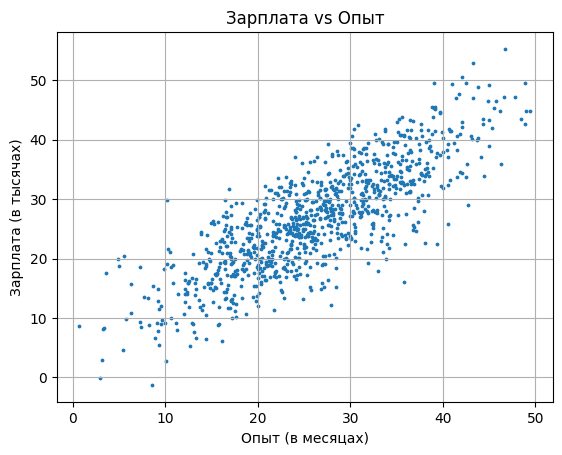

In [6]:
# Построим график зависимости зарплаты от опыта
point_size = 3

plt.scatter(df['exp(in months)'],df['salary(in thousands)'], label='Data points', s=point_size)
plt.xlabel('Опыт (в месяцах)')
plt.ylabel('Зарплата (в тысячах)')
plt.title('Зарплата vs Опыт')
plt.grid(True)

#из графика видно, что наши данные имеют четко выраженную линейную зависимость

# Построим линейную регрессию "с нуля" с использованием NumPy

In [7]:
# Преобразуем данные в массивы NumPy
X = np.array(df['exp(in months)'])
y = np.array(df['salary(in thousands)'])

Для линейной регрессии с одной независимой переменной (в нашем случае это опыт работы) уравнение регрессии имеет следующий вид: y = ax + b

y - зависимая переменная (в нашем случае это зарплата)
x - независимая переменная (в нашем случае это опыт работы)
a - коэффициент наклона
b - свободный член


Метод наименьших квадратов находит коэффициенты a и b так, чтобы минимизировать сумму квадратов отклонений между фактическими значениями y и предсказанными значениями y.

In [8]:
# Нам нужно вычислить угол наклона прямой a и ее сдвиг b в уравнении Y = aX + b
# Вычислим средние значения X и y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Вычислим параметры линейной регрессии (наклон и пересечение)
# сумма произведений отклонений независимых переменных от среднего значения умноженная
# на отклонения зависимых переменных от среднего значения.
numerator = np.sum((X - mean_x) * (y - mean_y))

# сумма квадратов отклонений независимых переменных от среднего значения
denominator = np.sum((X - mean_x) ** 2)

# коэффициент, который определяет угол наклона линии регрессии.
# Показывает, насколько изменяется зависимая переменная (в данном случае, зарплата) при изменении независимой переменной (в данном случае, опыт) на одну единицу.
# "a" показывает, насколько в среднем увеличивается или уменьшается значение целевой переменной при изменении признака.
# Если угол наклона уравнения регрессии равен 1, то это означает, что зарплата увеличивается на 1 тысячу
# за каждый год опыта работы. Если угол наклона равен 0,5, то это означает, что зарплата увеличивается на 0,5
# тысячи за каждый год опыта работы.

a = numerator / denominator

# Значение целевой переменной, когда независимая переменная равна нулю.
# или точка, в которой линия регрессии пересекает ось y, когда ось x равна нулю.

b = mean_y - a * mean_x

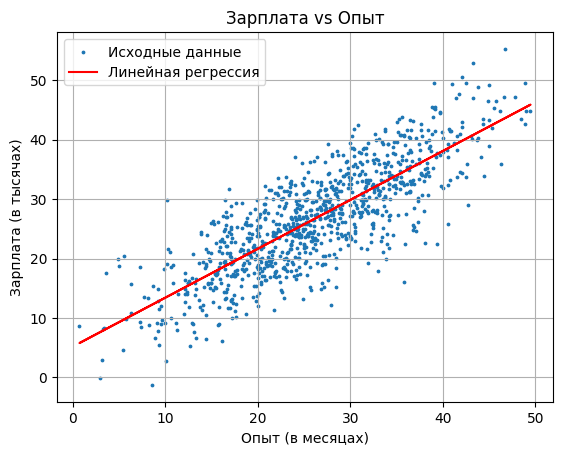

Линейная регрессия: y = 0.82 * x + 5.20


In [9]:
# Построим линейную регрессию
y_pred_lin = a * X + b

# Построим график данных и линейной регрессии
plt.scatter(X, y, label='Исходные данные', s=point_size)
plt.plot(X, y_pred_lin, color='r', label='Линейная регрессия')

plt.xlabel('Опыт (в месяцах)')
plt.ylabel('Зарплата (в тысячах)')
plt.title('Зарплата vs Опыт')
plt.grid(True)
plt.legend()
plt.show()

# Выведите уравнение линейной регрессии
print(f'Линейная регрессия: y = {a:.2f} * x + {b:.2f}')


# Сравним нашу линейную регрессию, с линейной регрессией из пакета Sklearn

In [10]:
# Нам надо разделить данные на зависимые и независимые переменные. Или на фичи (факторы) и отклик

X_sk = df.iloc[:,0:1].values
y_sk = df.iloc[:,1].values

In [11]:
# Посмотрим размерность полученных данных. Вы наверняка заметили, что мы преобразовали одномерный массив X в двумерный,
# это сделано для соблюдения требований библиотеки Scikit-Learn. Мы приводим данные к формату, который она ожидает
# для метода fit в LinearRegression.
# Scikit-Learn разработан для работы с множеством признаков, и ожидается, что данные будут представлены в форме X
# с размерностью (n_samples, n_features). В случае одномерного массива данных, у нас есть только один признак,
# поэтому мы преобразуем его в двумерный массив с размерностью (n_samples, 1) с помощью X = X.reshape(-1, 1).

print(X_sk.shape)
print(y_sk.shape)

(1000, 1)
(1000,)


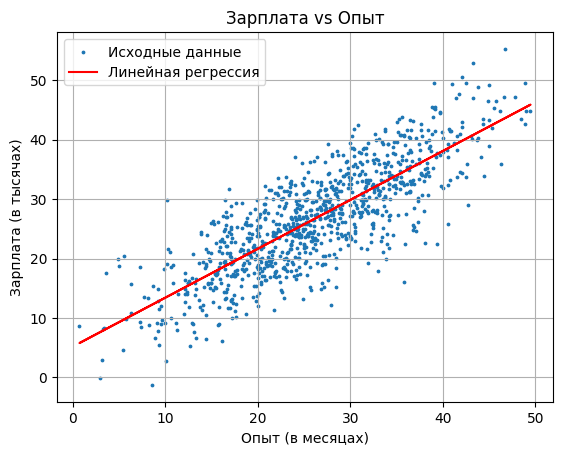

Linear Regression: y = 0.82 * x + 5.20


In [12]:
# Построим линейную регрессию
lin_reg = LinearRegression()

# Обучим алгоритм на наших данных
lin_reg.fit(X_sk, y_sk)
y_pred_lin_sk = lin_reg.predict(X_sk)

# Построим график данных и линейной регрессии
plt.scatter(X, y, label='Исходные данные', s=point_size)
plt.plot(X_sk, y_pred_lin_sk, color='r', label='Линейная регрессия')
plt.xlabel('Опыт (в месяцах)')
plt.ylabel('Зарплата (в тысячах)')
plt.title('Зарплата vs Опыт')
plt.grid(True)
plt.legend()
plt.show()


# Выведем коэффициенты уравнения линейной регрессии
a_sk = lin_reg.coef_[0]
b_sk = lin_reg.intercept_
print(f'Linear Regression: y = {a_sk:.2f} * x + {b_sk:.2f}')

In [13]:
# Посчитаем ошибки

# Вычисляем MSE (среднеквадратичная ошибка)
lin_mse = mean_squared_error(y_sk, y_pred_lin_sk)

# Вычислим RMSE (среднеквадратичная ошибка)
lin_rmse = math.sqrt(lin_mse)

# Вычислим MAE (средняя абсолютная ошибка)
lin_mae = mean_absolute_error(y_sk, y_pred_lin_sk)

# Выведем результаты
print(f'Linear Regression MSE: {lin_mse:.2f}')
print(f'Linear Regression RMSE: {lin_rmse:.2f}')
print(f'Linear Regression MAE: {lin_mae:.2f}')

Linear Regression MSE: 26.75
Linear Regression RMSE: 5.17
Linear Regression MAE: 4.09


# Давайте попробуем аппроксимировать данные полиномом

Построим полиномиальную регрессию степени 3. Уравнение будет иметь следующий вид:

$y = {a_{3}} * x^{3} + {a_{2}} * x^{2} + {a_{1}} * x + {a_{0}} + 𝛆$





In [14]:
# Создаем полиномиальные признаки степени 3
poly = PolynomialFeatures(degree=3)

# Преобразуем признак опыта в месяцах в полиномиальные признаки
X_poly = poly.fit_transform(X_sk)

# Создаем и обучаем модель полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_sk)

# Рассчитаем значения полиномиальной регрессии на заданных данных

y_pred_poly = poly_reg.predict(X_poly)

# Сократилась ли ошибка?

poly_mse = mean_squared_error(y_sk, y_pred_poly)
poly_rmse = math.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_sk, y_pred_poly)

# Выведем результаты
print(f'Polynomial Regression MSE: {poly_mse:.4f}')
print(f'Polynomial Regression RMSE: {poly_rmse:.4f}')
print(f'Polynomial Regression MAE: {poly_mae:.4f}')


# Вычисляем коэффициенты полиномиальной регрессии
poly_coef = poly_reg.coef_
poly_intercept = poly_reg.intercept_

# Выведем уравнение полинома
equation = f'y = {poly_coef[3]:.6f}x^3 + {poly_coef[2]:.6f}x^2 + {poly_coef[1]:.6f}x + {poly_coef[0]:.2f} + {poly_intercept:.6f}'
print('Уравнение полиномиальной регрессии (степень 3):')
print(equation)



Polynomial Regression MSE: 26.7188
Polynomial Regression RMSE: 5.1690
Polynomial Regression MAE: 4.0872
Уравнение полиномиальной регрессии (степень 3):
y = 0.000055x^3 + -0.002537x^2 + 0.831451x + 0.00 + 5.593209


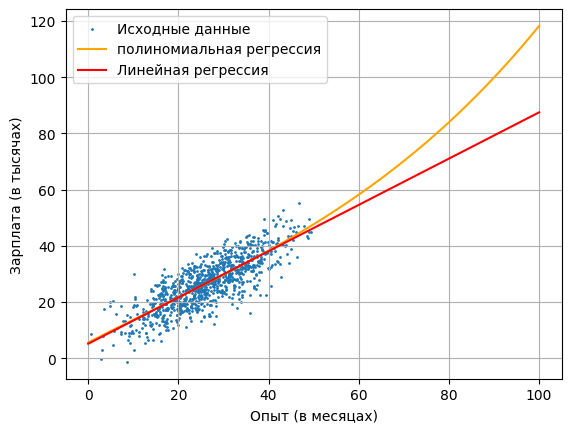

In [15]:
# на наших данных сложно увидеть, отличие пониномиальной функции от линиейной
# Продлим интервал опыта до 100 месяцев и рассчитаем регресиию в заданном интервале

x_100 = np.linspace(0, 100, 1000)
y_100_poly = poly_reg.predict(poly.transform(x_100.reshape(-1, 1)))
y_100_lin = lin_reg.predict(x_100.reshape(-1, 1))


# Изобразим на графике
plt.scatter(X, y, label='Исходные данные', s=1)
plt.plot(x_100, y_100_poly, color='orange', label='полиномиальная регрессия')
plt.plot(x_100, y_100_lin, color='r', label='Линейная регрессия')
plt.xlabel('Опыт (в месяцах)')
plt.ylabel('Зарплата (в тысячах)')
plt.grid(True)
plt.legend()
plt.show()


Данных достаточно много, чтобы регрессия смогла их обобщить линейной функцией, давайте посмотрим, как поведет себя регрессия, если данных будет меньше и обобщить линейной функцией будет сложнее

Линейная регрессия MSE: 17.7662
Полиномиальная регрессия MSE: 16.1020


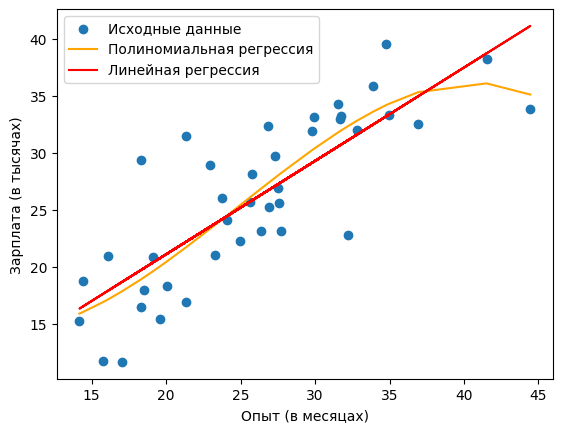

In [16]:
# Возьмем певые 40 значений из иcходных данных
exp_in_months = df['exp(in months)'][:40].to_numpy()
salary_in_thousands = df['salary(in thousands)'][:40].to_numpy()

# Построим линейную регрессию
lin_reg_example = LinearRegression()

# Обучим алгоритм на наших данных
lin_reg_example.fit(exp_in_months.reshape(-1, 1), salary_in_thousands)
salary_in_thousands_pred_lin = lin_reg_example.predict(exp_in_months.reshape(-1, 1))

# Обучаем полиномиальную модель регрессии
poly_reg_example = LinearRegression()

# Создаем полиномиальные признаки степени 3
poly = PolynomialFeatures(degree=3)
exp_in_months_poly = poly.fit_transform(exp_in_months.reshape(-1, 1))

# Обучаем модель полиномиальной регрессии
poly_reg_example.fit(exp_in_months_poly, salary_in_thousands)

# Предсказываем с использованием модели полиномиальной регрессии
sorted_exp_in_months = np.sort(exp_in_months)
sorted_salary_predicted = poly_reg_example.predict(poly.fit_transform(sorted_exp_in_months.reshape(-1, 1)))

# Вычисляем MSE
mse_lin = mean_squared_error(salary_in_thousands, salary_in_thousands_pred_lin)
mse_poly = mean_squared_error(salary_in_thousands, poly_reg_example.predict(exp_in_months_poly))
print(f'Линейная регрессия MSE: {mse_lin:.4f}')
print(f'Полиномиальная регрессия MSE: {mse_poly:.4f}')

# Строим график
plt.scatter(exp_in_months, salary_in_thousands, label='Исходные данные')
plt.plot(sorted_exp_in_months, sorted_salary_predicted, color='orange', label='Полиномиальная регрессия')
plt.plot(exp_in_months, salary_in_thousands_pred_lin, color='r', label='Линейная регрессия')
plt.xlabel('Опыт (в месяцах)')
plt.ylabel('Зарплата (в тысячах)')
plt.legend()
plt.show()


# Предскажем зарплату, если у нас опыт 5.5 лет, то есть 65 месяцев

In [17]:
x_predict = np.array([[65]])


print(f'Предсказание линейной регрессии: {lin_reg.predict(x_predict)}')
print(f'Предсказание полиномиальной регрессии: {poly_reg.predict(poly.transform(x_predict))}')


Предсказание линейной регрессии: [58.68375158]
Предсказание полиномиальной регрессии: [63.98181255]
